In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('marketing_campaign_model_data.csv')

# Parse any date columns again if needed
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

In [38]:
features = [
    'R_Score', 'F_Score', 'M_Score', 
    'Age', 'Income', 'Kidhome', 'Teenhome',
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
]
target = 'Response'


In [39]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.98      0.93       572
           1       0.66      0.19      0.29       100

    accuracy                           0.86       672
   macro avg       0.76      0.59      0.61       672
weighted avg       0.84      0.86      0.83       672

ROC AUC Score: 0.7953146853146852
Confusion Matrix:
 [[562  10]
 [ 81  19]]


In [43]:
import numpy as np
coef_table = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(coef_table.to_markdown(index=False))


| Feature             |   Coefficient |
|:--------------------|--------------:|
| R_Score             |    0.691086   |
| MntWines            |    0.56884    |
| M_Score             |    0.552016   |
| NumWebPurchases     |    0.243979   |
| Kidhome             |    0.23732    |
| MntMeatProducts     |    0.223744   |
| NumCatalogPurchases |    0.14146    |
| MntFruits           |    0.0953911  |
| MntGoldProds        |    0.0639338  |
| F_Score             |    0.0246599  |
| Age                 |    0.00269325 |
| MntSweetProducts    |   -0.0437972  |
| MntFishProducts     |   -0.0759331  |
| Income              |   -0.296351   |
| Teenhome            |   -0.375085   |
| NumStorePurchases   |   -0.806589   |


In [44]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
import pandas as pd
pd.DataFrame(report).T.round(2).to_markdown()


'|              |   precision |   recall |   f1-score |   support |\n|:-------------|------------:|---------:|-----------:|----------:|\n| 0            |        0.87 |     0.98 |       0.93 |    572    |\n| 1            |        0.66 |     0.19 |       0.29 |    100    |\n| accuracy     |        0.86 |     0.86 |       0.86 |      0.86 |\n| macro avg    |        0.76 |     0.59 |       0.61 |    672    |\n| weighted avg |        0.84 |     0.86 |       0.83 |    672    |'

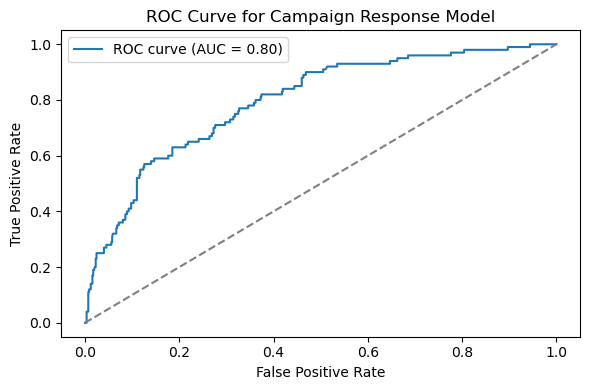

In [46]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0,1],[0,1],'--',color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Campaign Response Model')
plt.legend()
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.show()
